# Code from previous sessions. 

This should look familiar....

In [5]:
# Imports and formatting the data
# See previous lab if this is confusing
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

num_classes = 10 
image_size = 784

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_data = training_images.reshape(training_images.shape[0], image_size) 
test_data = test_images.reshape(test_images.shape[0], image_size)

training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# A helpful function we'll be using all over the place to plot training information:
def plot_training_history(history, model):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()
    
    loss, accuracy  = model.evaluate(test_data, test_labels, verbose=False)
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

# Activation Functions

Each node in a neural net has an activation function. While it is theoretically possible for each individual node to have a unique activation function, it's quite uncommon. Typically, every node in any particular layer uses the same activation function. 

Consider this image of a single node:

![](img/networkZoomMore.png)

In this case, the "activation function" is the sigmoid function. That function looks like this:

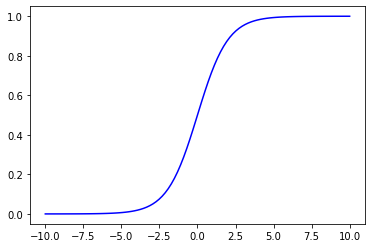

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# np.e is Euler's constant, the base of the natural logarithm 
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

# Construct a range to plot
r = np.linspace(-10, 10, 100)
plt.plot(r, sigmoid(r), 'b')
plt.show()

This function is a common choice, and is the O.G. activation function. It has some important and nice properties:

* is differentiable, which is very important because of how gradient descent and backpropogation work.
* Is bounded between 0 and 1.

It also has some problems, in particlar one of the reasons sigmoid is falling out of favor is called the vanishing gradient problem. Consider this plot with sigmoid and it's derivative:

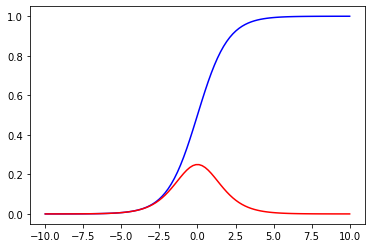

In [7]:
# Yes, it's freaky that the derivative involves the function itself. 
# Calculus is cool, but we're not going to talk about that today!
def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

r = np.linspace(-10, 10, 100)
plt.plot(r, sigmoid(r), 'b')
plt.plot(r, sigmoid_prime(r), 'r')
plt.show()

## The Vanishing Gradient Problem:

Notice that at both ends of the range the derivative (red line) approaches 0. In terms of tuning neural networks, this means that the corrections applied based on the loss function can become very small—causing the node to effectively stop learning. This is especially true of neural networks with several layers, because the vanishing gradient problem stacks across the layers. 

Let's examine this problem in context, this code should look familiar from previous exercises:

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_17 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_18 (Dense)             (None, 10)               

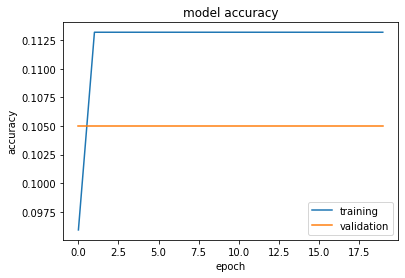

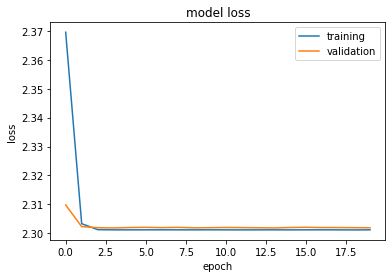

Test loss: 2.3
Test accuracy: 0.113


In [8]:
model = Sequential()
model.add(Dense(units=10, activation='sigmoid', input_shape=(image_size,)))

for _ in range(10):
    model.add(Dense(units=10, activation='sigmoid'))

model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history, model)

## Micro-exercise: Discuss This Result

Notice that the network didn't REALLY learn anything after the first epoch... 

In groups of 2-4, discuss why this might be happening?

> Hint: this is called the "vanishing gradient" problem for a reason. Why is the gradient relevant?

## Addressing Vanishing Gradient With ReLU

Because the vanishing gradient problem has to do with the derivative of the sigmoid always having small fractional values, especially at the tails, ML researchers and engineers have mostly stopped using it as an activation function. ReLU is an example of an alternative that does not suffer from the vanishing gradient problem.

Why not? Let's define and plot it, the function is almost hilariously simple:

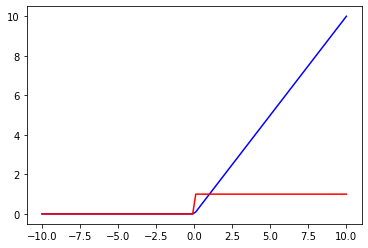

In [5]:
# This function is hard to read because we're applying it to
# numpy arrays, but for each item in x we return max(0, x[i])
def relu(x):
    return np.maximum(x, np.zeros(len(x)))

# This function is non-continuous, but the derivative can be 
# expressed as a very simple discrete function that works for
# our purpose, if x[i] > 0 return 1, else return 0:
def relu_prime(x):
    return np.array([1 if num > 0 else 0 for num in x])

# Construct a range to plot
r = np.linspace(-10, 10, 100)
plt.plot(r, relu(r), 'b')
plt.plot(r, relu_prime(r), 'r')
plt.show()

## Some Notes About Relu

Although ReLU remains very popular even in modern SOTA architectures, it does have a problem related to its gradient:  the gradient can simply be 0, and once that happens the weights attached to that node will no longer be updated at all!

This is sometimes called the "dead node" problem, and although it is a theoretical possibility, in practice it seems to happen infrequently enough that ReLU based networks remain popular and successful.

The simplicity of this function servers as an important reminder about neural networks and machine learning in general: fundamentally we are combining a lot of very simple things, and repeating a simple process MANY MANY times. The result is complex, but the procecss itself is built of simple parts. 

Another benefit of ReLU: it and it's gradient are much faster to compute than sigmoid and sigmoid's gradient, which speeds up our training epochs.

## A Sample Netowork With ReLU:

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_13 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_14 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_15 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_17 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_18 (Dense)             (None, 10)               

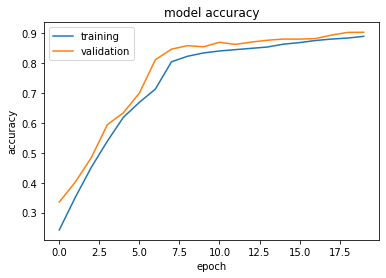

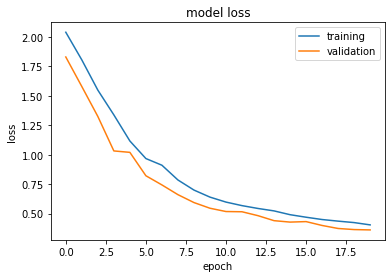

Test loss: 0.413
Test accuracy: 0.887


In [6]:
model = Sequential()
model.add(Dense(units=10, activation='relu', input_shape=(image_size,)))

for _ in range(10):
    model.add(Dense(units=10, activation='relu'))

model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history, model)

## Leaky ReLU

Leaky ReLU addresses the "dead node" problem by adding a small slope to the left hand side of the function (rather than a flat 0 slope line). 

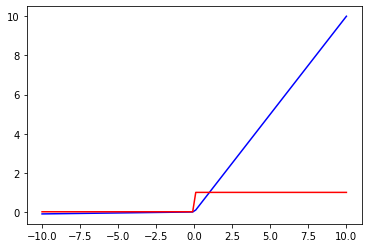

In [7]:
# For values greater than 0, leaky ReLU is the same as ReLU.
# For values less than 0, we return x[i] * 0.01 instead of just 0
# Now the gradient cannot die, because the line always has a slope.
def leaky_relu(x):
    return np.array([num if num > 0 else num * .01 for num in x])

def leaky_relu_prime(x):
    return np.array([1 if num > 0 else .01 for num in x])

r = np.linspace(-10, 10, 100)
plt.plot(r, leaky_relu(r), 'b')
plt.plot(r, leaky_relu_prime(r), 'r')
plt.show()

Leaky is not strictly better, and it can sometimes be hard to know when it will be better or not. As with many neural network tasks, the best way to prove something is empirically. Lets see if Leaky ReLU improves our 10 layer network

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 10)                7850      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 10)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 10)                110       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 10)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                110       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 10)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)               

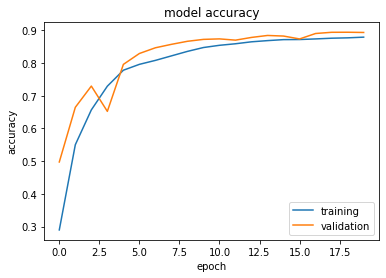

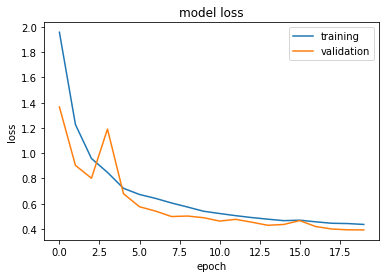

Test loss: 0.432
Test accuracy: 0.879


In [8]:
# Using Leakly ReLU is slightly different in Keras, which can be annoying.
# Additionally, Keras allows us to choose any slope we want for the "leaky" part
# rather than being statically 0.01 as in the above two functions. 
from tensorflow.keras.layers import LeakyReLU

model = Sequential()
model.add(Dense(units=10, input_shape=(image_size,)))
model.add(LeakyReLU(alpha=.01))

for _ in range(10):
    model.add(Dense(units=10))
    model.add(LeakyReLU(alpha=.01))

model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history, model)

## The Importance of Non-Linearity

In order to satisfy the Universal Function Approximation theorem we must choose activation functions that are not strictly linear. Even ReLU counts, but if we only use linear activation functions then our neural networks, no matter how complex, can only learn to approximate linear functions themselves. See [Deep Learning and Neural Network's Chapter 5](http://neuralnetworksanddeeplearning.com/chap5.html) for a comprehensive proof of this.

## Special Cases

While many of these activation functions are "general purpose", especially in the hidden layers, there are a handful of important activation functions that serve special purposes. The softmax function is one such activation function that is widely used. 

Softmax is used to produce N output values that always sum to one. It is almost always used in the final layer of classification networks, and we interpret the results as the proababilities or confidence of our network's predictions. [Read more about softmax](https://medium.com/data-science-bootcamp/understand-the-softmax-function-in-minutes-f3a59641e86d)

Similarly, when using Neural Networks for regression, it's common to use a plain old "linear" activation function allowing your network to end up making an unbounded prediction of some real number. We'll see this in Object Localization, but it happens in a number of other types of model as well.

## Micro-Exercise: Use A New Activation Function

Make a neural network with at least 3 hidden layers, and a non-sigmoid activation function in each layer. You may use the same activation in all your hidden layers, or mix and match. Then, train your network for 5 epochs and compare your results to those you achieved in the first homework exercise.

In [ ]:
# Your code here

## Bonus, There Are A Lot More Activation Functions.

There are other activation functions, and there is ongoing research into which ones perform best and experimenting with new activation functions. 

In addition to the vanishing and dying gradient problems, another factor in the performance of activation functions is how efficent they are to compute, and how efficent their derivatives are to compute. Remember that we're computing these functions billions of times (or more!) during training. Relu is VERY FAST to compute, and so is it's derivative. Sigmoid, tanh, and some other commonly used activations are more expensive. 

Here are a couple other examples:

A rule of thumb: Things are changing quickly. Do some quick research before you build a new model to determine if there is a new "activation function of the week". Use that one. If it doesn't produce results, try a different one. Repeat until one works, or you have exhausted the activation functions that you know of. At that point, you may need to collect more data, change your architecture, or try a different kind of model.

At the time of this writing, one of the most popular activation functions is the Scaled Exponential Linear Unit (SELU). This activation is another modified ReLU, where the values greater than zero are still a linear function, the values below zero are an exponential curve, and the function scales the output to avoid a problem called "exploding gradient" which is the opposite of a dying or vanishing gradient:

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_37 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_38 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_39 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_40 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_41 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_42 (Dense)             (None, 10)               

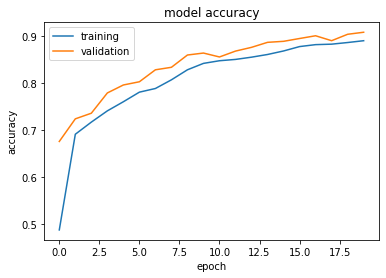

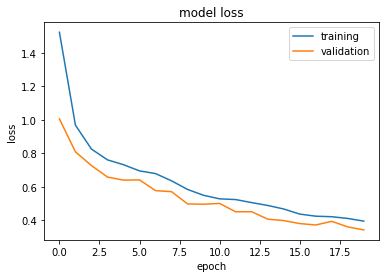

Test loss: 0.392
Test accuracy: 0.89


In [9]:
model = Sequential()
model.add(Dense(units=10, activation='selu', input_shape=(image_size,)))

for _ in range(10):
    model.add(Dense(units=10, activation='selu'))

model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history, model)

## Bonus, You Can Combine Activations

Also remember that it's not nessesary to use the same activation for every layer in a network! For example, starting with a sigmoid and following up with ReLU's can work just fine, although it is rather uncommon.

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 10)                7850      
_________________________________________________________________
dense_49 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_50 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_51 (Dense)             (None, 10)                110       
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 10)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 10)                110       
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 10)               

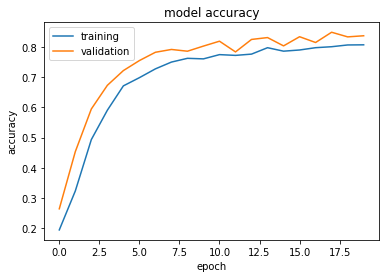

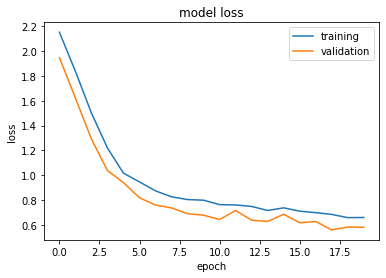

Test loss: 0.629
Test accuracy: 0.818


In [10]:
model = Sequential()

model.add(Dense(units=10, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=10, activation='tanh'))
model.add(Dense(units=10, activation='exponential'))

model.add(Dense(units=10))
model.add(LeakyReLU(alpha=.01))

model.add(Dense(units=10))
model.add(LeakyReLU(alpha=.05))

model.add(Dense(units=10))
model.add(LeakyReLU(alpha=.3))

model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history, model)